# Keep the months for *measurement date*  in *XGBoost*  to get seasonal impacts
# Keep the day for *measurement date*  in *LSTM*  to better use the time-series memory

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/H!5 Group55/X_train_Hi5.csv',nrows=100000,low_memory=False)

In [ ]:
columns = df.columns
columns

Index(['row_index', 'piezo_station_department_code',
       'piezo_station_update_date', 'piezo_station_investigation_depth',
       'piezo_station_department_name', 'piezo_station_commune_code_insee',
       'piezo_station_pe_label', 'piezo_station_bdlisa_codes',
       'piezo_station_altitude', 'piezo_station_bss_code',
       ...
       'prelev_longitude_2', 'prelev_latitude_2',
       'prelev_commune_code_insee_2', 'prelev_other_volume_sum',
       'insee_%_agri', 'insee_pop_commune', 'insee_med_living_level',
       'insee_%_ind', 'insee_%_const', 'piezo_groundwater_level_category'],
      dtype='object', length=136)

In [ ]:
# prompt: fill the missing value with forward fill

# Fill missing values with forward fill
for col in df.columns:
  df[col] = df[col].ffill()

In [ ]:
df.head(n=15)

,row_index,piezo_station_department_code,piezo_station_update_date,piezo_station_investigation_depth,piezo_station_department_name,piezo_station_commune_code_insee,piezo_station_pe_label,piezo_station_bdlisa_codes,piezo_station_altitude,piezo_station_bss_code,...,prelev_longitude_2,prelev_latitude_2,prelev_commune_code_insee_2,prelev_other_volume_sum,insee_%_agri,insee_pop_commune,insee_med_living_level,insee_%_ind,insee_%_const,piezo_groundwater_level_category
0,0,01,Sun Jul 14 13:00:02 CEST 2024,20.00,Ain,01073,PIEZOMETRE - MARAIS DE LAVOURS (CEYZERIEU - BR...,['712AH37'],232.00,07004X0046/D6-20,...,5.698947,45.725106,1454.0,1.793055e+09,11.8,992.0,25250,2.9,16.2,High
1,1,01,Sun Jul 14 13:00:02 CEST 2024,35.60,Ain,01363,PIEZOMETRE - GRAVIERE (ST-JEAN-LE-VIEUX - BRGM...,['712GB05'],247.25,06754X0077/F1,...,5.464933,46.210734,1051.0,1.085125e+09,0.6,1786.0,24660,44.5,11,Very High
2,2,01,Sun Jul 14 13:00:02 CEST 2024,35.22,Ain,01244,PIEZOMETRE - BORD AUTOROUTE (MEXIMIEUX - BRGM ...,['040AJ43'],218.77,06993X0226/MEXI_2,...,5.085060,45.812828,69266.0,3.810492e+08,0,8085.0,24890,8.4,7.8,High
3,3,01,Sun Jul 14 13:00:02 CEST 2024,34.20,Ain,01288,PIEZOMETRE - GRENY (PERON - BRGM 01) - BSH,"['516AA00', '516AF00']",499.85,06533X0070/F2,...,5.802841,46.366049,39286.0,3.800911e+08,1.5,2838.0,39700,2.4,5.2,Very High
4,4,01,Sun Jul 14 13:00:02 CEST 2024,37.30,Ain,01422,FORAGE - ENCLOS (TOSSIAT - BRGM 01) - BSH,['507AB00'],260.00,06518X0026/P2,...,5.377265,46.080989,1273.0,1.966631e+07,0.2,1352.0,26180,21.5,9.8,Very Low
5,5,01,Fri Jun 28 07:31:38 CEST 2024,50.00,Ain,01022,NaN,['516AK00'],250.00,07004X0019/S3,...,5.812855,46.052623,1189.0,1.147286e+10,0,1177.0,22000,3.3,8.4,Very High
6,6,01,Sun Jul 14 13:00:02 CEST 2024,21.00,Ain,01390,PIEZOMETRE - STATION ESSENCE (ST-VULBAS - BRGM...,['712GB05'],208.21,06993X0087/F6,...,5.085060,45.812828,69266.0,3.854916e+08,0,1234.0,24750,51.4,0.6,High
7,7,01,Sun Jul 14 13:00:02 CEST 2024,78.00,Ain,01173,PIEZOMETRE - CENTRE EQUESTRE (GEX - BRGM 01) -...,['516AF00'],558.68,06288X0096/SB,...,5.865995,46.397061,39478.0,1.509923e+08,0,13078.0,35280,3.4,5.1,Very Low
8,8,01,Sun Jul 14 13:00:02 CEST 2024,10.00,Ain,01010,FORAGE - VOIE FERREE (BOURSIN - BRGM 01) - BSH,['712AH37'],250.45,06775X0010/BOURSI,...,5.812855,46.052623,1189.0,2.213189e+09,0,1125.0,24700,74.8,6.7,Low
9,9,01,Sun Jul 14 13:00:02 CEST 2024,62.60,Ain,01446,FORAGE - GEOTHERMIE (VILLENEUVE - BRGM 01) - BSH,['507AC00'],265.22,06742X0001/VILLEN,...,4.725474,45.983336,69264.0,2.920414e+07,6,1569.0,26440,1.2,21.4,High


In [ ]:
len(df['piezo_station_bss_code'].unique())

2711

In [ ]:
df['piezo_continuity_code']

,piezo_continuity_code
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0
...,...
99995,2.0
99996,2.0
99997,2.0
99998,2.0


In [ ]:
df

,row_index,piezo_station_department_code,piezo_station_update_date,piezo_station_investigation_depth,piezo_station_department_name,piezo_station_commune_code_insee,piezo_station_pe_label,piezo_station_bdlisa_codes,piezo_station_altitude,piezo_station_bss_code,...,prelev_longitude_2,prelev_latitude_2,prelev_commune_code_insee_2,prelev_other_volume_sum,insee_%_agri,insee_pop_commune,insee_med_living_level,insee_%_ind,insee_%_const,piezo_groundwater_level_category
0,0,01,Sun Jul 14 13:00:02 CEST 2024,20.00,Ain,01073,PIEZOMETRE - MARAIS DE LAVOURS (CEYZERIEU - BR...,['712AH37'],232.00,07004X0046/D6-20,...,5.698947,45.725106,1454.0,1.793055e+09,11.8,992.0,25250,2.9,16.2,High
1,1,01,Sun Jul 14 13:00:02 CEST 2024,35.60,Ain,01363,PIEZOMETRE - GRAVIERE (ST-JEAN-LE-VIEUX - BRGM...,['712GB05'],247.25,06754X0077/F1,...,5.464933,46.210734,1051.0,1.085125e+09,0.6,1786.0,24660,44.5,11,Very High
2,2,01,Sun Jul 14 13:00:02 CEST 2024,35.22,Ain,01244,PIEZOMETRE - BORD AUTOROUTE (MEXIMIEUX - BRGM ...,['040AJ43'],218.77,06993X0226/MEXI_2,...,5.085060,45.812828,69266.0,3.810492e+08,0,8085.0,24890,8.4,7.8,High
3,3,01,Sun Jul 14 13:00:02 CEST 2024,34.20,Ain,01288,PIEZOMETRE - GRENY (PERON - BRGM 01) - BSH,"['516AA00', '516AF00']",499.85,06533X0070/F2,...,5.802841,46.366049,39286.0,3.800911e+08,1.5,2838.0,39700,2.4,5.2,Very High
4,4,01,Sun Jul 14 13:00:02 CEST 2024,37.30,Ain,01422,FORAGE - ENCLOS (TOSSIAT - BRGM 01) - BSH,['507AB00'],260.00,06518X0026/P2,...,5.377265,46.080989,1273.0,1.966631e+07,0.2,1352.0,26180,21.5,9.8,Very Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,105166,32,Fri Jun 28 07:31:38 CEST 2024,5.00,Gers,32398,SAINT-MONT - 32,['948AA03'],96.00,09793X0003/F,...,-0.334433,43.549597,64141.0,4.333680e+07,0.9,308.0,21560,47.7,0,Very Low
99996,105167,32,Fri Jun 28 07:31:38 CEST 2024,12.30,Gers,32127,Puits de las Cabanas (Estang-32),['312AA05'],130.00,09523X0034/F,...,-0.267955,43.765262,40080.0,2.996826e+07,1.3,666.0,19810,28.2,1.3,High
99997,105168,32,Fri Jun 28 07:31:38 CEST 2024,253.00,Gers,32156,près de Flourette,['334AC05'],178.00,10072X0026/F,...,0.413766,43.471565,32045.0,2.580803e+07,2.3,215.0,22540,3.8,12.1,Average
99998,105169,32,Fri Jun 28 07:31:38 CEST 2024,781.50,Gers,32115,A Seignebon,['334AC05'],155.00,09536X0008/F,...,0.115789,43.861357,32119.0,1.601369e+07,48.1,322.0,20690,25.9,0,Average


In [ ]:
# prompt: Please help me generate a seasonality plot based on the day of the time feature 'piezo_station_update_date'? First transform the data into pd.datetime

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Assuming 'piezo_station_update_date' is already in your DataFrame 'df'

date_cols = ['piezo_station_update_date', 'piezo_measurement_date']#, 'meteo_date', 'hydro_observation_date_elab']

def remove_timezone_abbreviation(date_str):
    if pd.isnull(date_str):
        return date_str
    # Remove timezone abbreviations (e.g., 'CEST', 'CET', 'PST', etc.)
    date_str = re.sub(r'\b[A-Z]{3,4}\b', '', date_str)
    return date_str.strip()


for col in date_cols:
    # Remove timezone abbreviations
    df[col] = df[col].astype(str).apply(remove_timezone_abbreviation)
    # Parse the cleaned date strings into datetime objects
    df[col] = pd.to_datetime(df[col], errors='coerce')


df[date_cols]


,piezo_station_update_date,piezo_measurement_date
0,2024-07-14 13:00:02,2020-01-01
1,2024-07-14 13:00:02,2020-01-01
2,2024-07-14 13:00:02,2020-01-01
3,2024-07-14 13:00:02,2020-01-01
4,2024-07-14 13:00:02,2020-01-01
...,...,...
99995,2024-06-28 07:31:38,2020-02-10
99996,2024-06-28 07:31:38,2020-02-10
99997,2024-06-28 07:31:38,2020-02-10
99998,2024-06-28 07:31:38,2020-02-10


In [ ]:
df['piezo_measurement_date'] = pd.to_datetime(df['timestamp']).dt.date

# Group by 'date' and sample 20 entries per day
# Replace `min_count` with the number of entries you expect on low-data days
min_count = 20
sampled_df = (
    df.groupby('piezo_measurement_date', group_keys=False)
    .apply(lambda group: group.sample(n=min(min_count, len(group)), random_state=42))
)

In [ ]:
df_sorted = df.sort_values(by='piezo_measurement_date')

# Display the sorted DataFrame (optional)
df_sorted['piezo_measurement_date'].unique()

<DatetimeArray>
['2020-01-01 00:00:00', '2020-01-02 00:00:00', '2020-01-03 00:00:00',
 '2020-01-04 00:00:00', '2020-01-05 00:00:00', '2020-01-06 00:00:00',
 '2020-01-07 00:00:00', '2020-01-08 00:00:00', '2020-01-09 00:00:00',
 '2020-01-10 00:00:00', '2020-01-11 00:00:00', '2020-01-12 00:00:00',
 '2020-01-13 00:00:00', '2020-01-14 00:00:00', '2020-01-15 00:00:00',
 '2020-01-16 00:00:00', '2020-01-17 00:00:00', '2020-01-18 00:00:00',
 '2020-01-19 00:00:00', '2020-01-20 00:00:00', '2020-01-21 00:00:00',
 '2020-01-22 00:00:00', '2020-01-23 00:00:00', '2020-01-24 00:00:00',
 '2020-01-25 00:00:00', '2020-01-26 00:00:00', '2020-01-27 00:00:00',
 '2020-01-28 00:00:00', '2020-01-29 00:00:00', '2020-01-30 00:00:00',
 '2020-01-31 00:00:00', '2020-02-01 00:00:00', '2020-02-02 00:00:00',
 '2020-02-03 00:00:00', '2020-02-04 00:00:00', '2020-02-05 00:00:00',
 '2020-02-06 00:00:00', '2020-02-07 00:00:00', '2020-02-08 00:00:00',
 '2020-02-09 00:00:00', '2020-02-10 00:00:00']
Length: 41, dtype: datetime

In [ ]:
# Convert 'piezo_station_update_date' to datetime objects
df['piezo_measurement_date'] = pd.to_datetime(df['piezo_measurement_date'])

# Extract the day of the week (0=Monday, 6=Sunday)
df['month'] = df['piezo_measurement_date'].dt.month

# Create the seasonality plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='your_target_variable', data=df) # Replace 'your_target_variable' with the actual column name you want to plot
plt.xlabel('Day of Week')
plt.ylabel('Your Target Variable') # Replace with the actual label
plt.title('Seasonality Plot by Day of Week')
plt.show()

In [ ]:
# prompt: Please help me split the dataset df using cross-validation, ensuring the validation and test split only contains data from months of 6,7,8,9; make the validatoin and test set 5% of the entire dataset size. But make sure the train dataset is on all months

# Assuming 'df' is your DataFrame and 'your_target_variable' is the target column
# Split the data into training, validation, and test sets based on months 6, 7, 8, 9.
# Validation and test sets represent 5% of the total dataset size each.


from sklearn.model_selection import train_test_split

# Filter data for months 6, 7, 8, 9
summer_months_df = df[df['month'].isin([6, 7, 8, 9])]

# Calculate the size of the validation and test sets (5% each)
validation_test_size = int(0.05 * len(df))

# Split the summer months data into validation and test sets
valid_df, test_df = train_test_split(summer_months_df, test_size=0.5, random_state=42)

#Ensure the validation and test sets have the desired size
valid_df = valid_df.head(validation_test_size //2)
test_df = test_df.head(validation_test_size // 2)

#The training set is all other months
train_df = df[~df.index.isin(valid_df.index) & ~df.index.isin(test_df.index)]

print("Train set shape:", train_df.shape)
print("Validation set shape:", valid_df.shape)
print("Test set shape:", test_df.shape)

In [ ]:
# prompt: Please help me build a XGBoost model with cross validation using the train, valid, test df above; it's a classification problem, using the f1 score as the evaluation score

import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

# Define features (X) and target (y)
features = [col for col in train_df.columns if col not in ['piezo_measurement_date', 'month','piezo_continuity_code']] #Exclude date, month, and target variable
target = 'piezo_continuity_code'

X_train = train_df[features]
y_train = train_df[target]
X_valid = valid_df[features]
y_valid = valid_df[target]
X_test = test_df[features]
y_test = test_df[target]


# Convert data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)
dtest = xgb.DMatrix(X_test,label=y_test)

# Define XGBoost parameters
params = {
    'objective': 'multi:softmax',  # For classification
    'eval_metric': 'mlogloss', #logloss for multiclass
    'num_class': len(y_train.unique()), # Number of classes
    'seed': 42,
    'max_depth': 6, # Adjust these parameters as needed
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
}


#Number of folds for cross-validation
n_folds = 5

# Initialize KFold
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)


f1_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
  print(f"Training fold {fold+1}")
  X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
  y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

  # Convert data to DMatrix format for XGBoost for each fold
  dtrain_fold = xgb.DMatrix(X_tr, label=y_tr)
  dval_fold = xgb.DMatrix(X_val, label=y_val)

  # Train the model
  model = xgb.train(params, dtrain_fold, num_boost_round=100, evals=[(dval_fold, 'eval')], early_stopping_rounds=10, verbose_eval=10)


  # Make predictions
  y_pred = model.predict(dval_fold)
  f1 = f1_score(y_val, y_pred, average='weighted')  # Calculate F1 score
  f1_scores.append(f1)

  print(f"Fold {fold+1} F1-score: {f1}")


print(f"Average F1-score across folds: {np.mean(f1_scores)}")

# Train final model on the entire training set
model = xgb.train(params, dtrain, num_boost_round=100) #you can adjust num_boost_round based on your best result from CV

#Make prediction on the test set
y_pred_test = model.predict(dtest)

# Evaluate the model on the test set
f1_test = f1_score(y_test, y_pred_test,average='weighted')
print(f"Test Set F1-Score: {f1_test}")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 136 entries, row_index to piezo_groundwater_level_category
dtypes: float64(90), int64(6), object(40)
memory usage: 103.8+ MB


In [ ]:
df.describe()

,row_index,piezo_station_investigation_depth,piezo_station_altitude,piezo_station_longitude,piezo_station_latitude,piezo_continuity_code,piezo_producer_code,meteo_id,meteo_latitude,meteo_longitude,...,prelev_volume_1,prelev_longitude_1,prelev_latitude_1,prelev_commune_code_insee_1,prelev_volume_2,prelev_longitude_2,prelev_latitude_2,prelev_commune_code_insee_2,prelev_other_volume_sum,insee_pop_commune
count,100000.00000,93886.000000,100000.000000,100000.000000,100000.000000,100000.000000,9.428000e+04,1.000000e+05,100000.000000,100000.000000,...,9.892700e+04,98927.000000,98927.000000,98927.000000,9.888700e+04,98887.000000,98887.000000,98887.000000,1.000000e+05,99030.000000
mean,52566.82401,86.122169,146.363091,2.222227,46.425102,1.999100,5.522693e+12,3.727307e+07,2.196448,46.431080,...,8.727574e+08,2.135268,46.472582,44735.720218,3.556081e+08,2.141231,46.467114,44996.054082,2.731853e+08,7083.418540
std,30374.82204,246.501041,190.678153,2.721093,2.173048,0.029987,1.120650e+13,2.085526e+07,2.680293,2.136743,...,4.419307e+09,2.641558,2.143439,24720.175257,2.455678e+09,2.640503,2.142734,24867.968747,1.537430e+09,32674.613612
min,0.00000,0.000000,-999.000000,-4.657129,41.399732,1.000000,1.960000e+02,1.027003e+06,-4.664167,42.384667,...,0.000000e+00,-4.487265,42.407792,1051.000000,1.541000e+03,-4.731051,42.435492,1027.000000,0.000000e+00,6.000000
25%,26311.75000,16.470000,41.230000,-0.104026,44.499602,2.000000,2.910000e+02,1.820700e+07,-0.152000,44.534667,...,9.087070e+05,-0.200520,44.560612,24551.000000,6.918670e+05,-0.139909,44.572622,24551.000000,1.100997e+07,479.000000
50%,52629.50000,38.000000,107.160000,1.899121,46.395888,2.000000,3.000000e+02,3.420900e+07,1.903167,46.417000,...,2.869521e+06,1.821023,46.511832,40320.000000,1.591235e+06,1.828238,46.476865,40309.000000,2.114979e+07,1236.000000
75%,78903.25000,80.000000,185.000000,4.205274,48.219760,2.000000,1.219000e+03,5.229400e+07,4.207500,48.205167,...,2.279200e+07,4.076880,48.250773,66195.000000,8.947526e+06,4.071172,48.250773,67462.000000,5.279361e+07,3752.000000
max,105170.00000,5233.400000,2150.000000,9.519890,50.971087,2.000000,4.049439e+13,9.558000e+07,8.145500,50.833833,...,3.508028e+10,8.087510,50.948383,95170.000000,3.311219e+10,8.087510,50.864884,94054.000000,2.566101e+10,873076.000000


In [ ]:
df['piezo_groundwater_level_category'].describe()

,piezo_groundwater_level_category
count,100000
unique,5
top,High
freq,26878


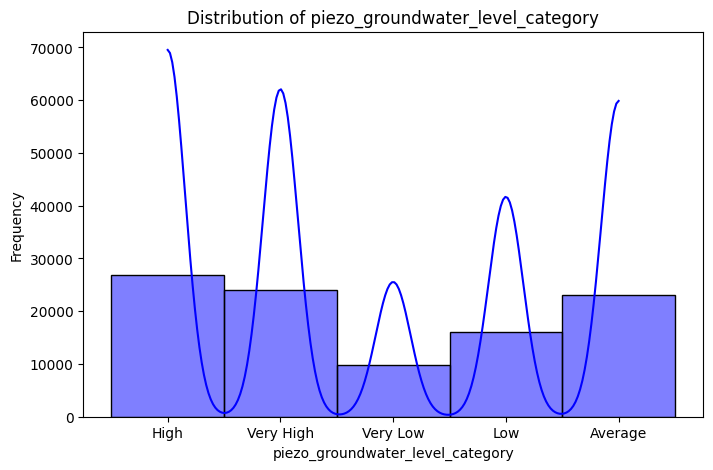

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['piezo_groundwater_level_category'], kde=True, bins=30, color='blue')
plt.title(f"Distribution of {'piezo_groundwater_level_category'}")
plt.xlabel('piezo_groundwater_level_category')
plt.ylabel('Frequency')
plt.show()

### X_test

In [ ]:
Xtest = pd.read_csv('/content/drive/MyDrive/H!5 Group55/X_test_Hi5.csv')

<ipython-input-18-1fb0c05a1208>:1: DtypeWarning: Columns (1,5,108,110,111,115,117,118,122,124,125) have mixed types. Specify dtype option on import or set low_memory=False.
  Xtest = pd.read_csv('/content/drive/MyDrive/H!5 Group55/X_test_Hi5.csv')


In [ ]:
# prompt: Please help me generate a seasonality plot based on the day of the time feature 'piezo_station_update_date'? First transform the data into pd.datetime

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Assuming 'piezo_station_update_date' is already in your DataFrame 'df'

date_cols = ['piezo_station_update_date', 'piezo_measurement_date']#, 'meteo_date', 'hydro_observation_date_elab']

def remove_timezone_abbreviation(date_str):
    if pd.isnull(date_str):
        return date_str
    # Remove timezone abbreviations (e.g., 'CEST', 'CET', 'PST', etc.)
    date_str = re.sub(r'\b[A-Z]{3,4}\b', '', date_str)
    return date_str.strip()


for col in date_cols:
    # Remove timezone abbreviations
    Xtest[col] = Xtest[col].astype(str).apply(remove_timezone_abbreviation)
    # Parse the cleaned date strings into datetime objects
    Xtest[col] = pd.to_datetime(Xtest[col], errors='coerce')


Xtest[date_cols]

,piezo_station_update_date,piezo_measurement_date
0,2024-07-14 13:00:02,2022-06-01
1,2024-07-14 13:00:02,2022-06-01
2,2024-07-14 13:00:02,2022-06-01
3,2024-07-14 13:00:02,2022-06-01
4,2024-07-14 13:00:02,2022-06-01
...,...,...
611203,2024-09-19 11:45:47,2023-09-30
611204,2024-09-19 14:41:55,2023-09-30
611205,2024-09-19 14:29:16,2023-09-30
611206,2023-12-14 19:02:16,2023-09-30


In [ ]:
Xtest_sorted = Xtest.sort_values(by='piezo_measurement_date')

# Display the sorted DataFrame (optional)
Xtest_sorted['piezo_measurement_date'].unique()

<DatetimeArray>
['2022-06-01 00:00:00', '2022-06-02 00:00:00', '2022-06-03 00:00:00',
 '2022-06-04 00:00:00', '2022-06-05 00:00:00', '2022-06-06 00:00:00',
 '2022-06-07 00:00:00', '2022-06-08 00:00:00', '2022-06-09 00:00:00',
 '2022-06-10 00:00:00',
 ...
 '2023-09-21 00:00:00', '2023-09-22 00:00:00', '2023-09-23 00:00:00',
 '2023-09-24 00:00:00', '2023-09-25 00:00:00', '2023-09-26 00:00:00',
 '2023-09-27 00:00:00', '2023-09-28 00:00:00', '2023-09-29 00:00:00',
 '2023-09-30 00:00:00']
Length: 244, dtype: datetime64[ns]

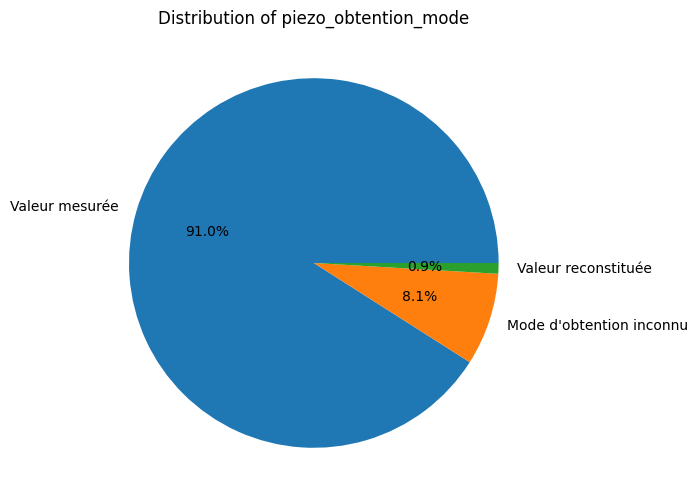

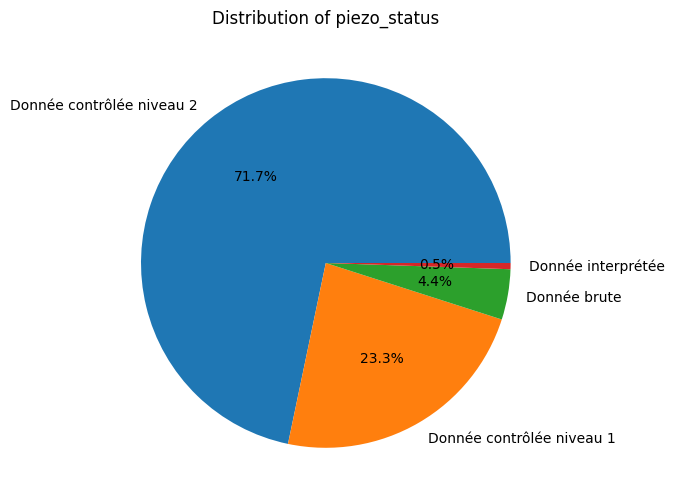

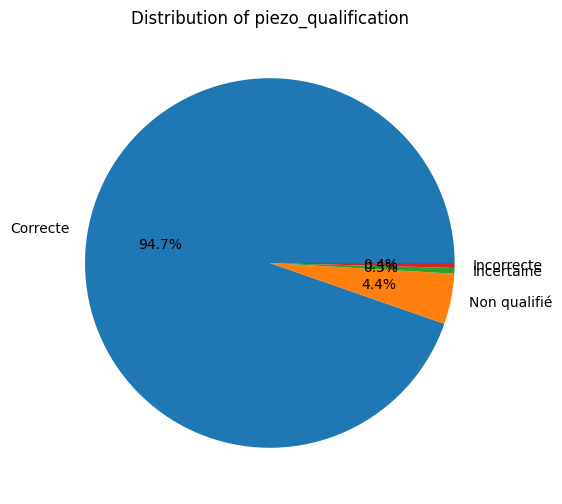

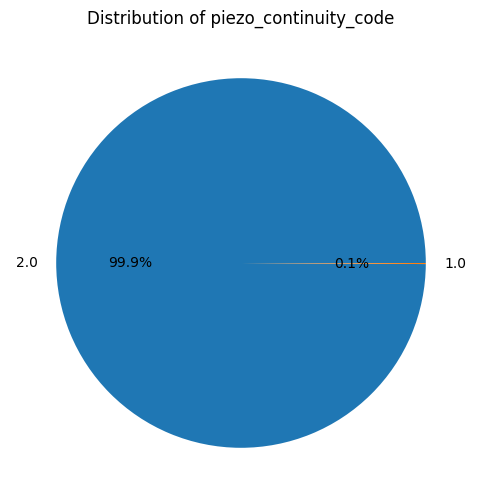

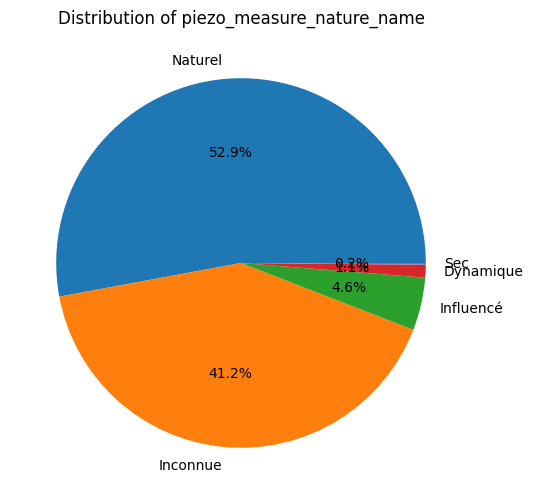

In [ ]:
# Pie chart for piezo_obtention_mode
plt.figure(figsize=(8, 6))
Xtest['piezo_obtention_mode'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of piezo_obtention_mode')
plt.ylabel('')  # Remove the y-axis label
plt.show()

# Pie chart for piezo_status
plt.figure(figsize=(8, 6))
Xtest['piezo_status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of piezo_status')
plt.ylabel('')  # Remove the y-axis label
plt.show()

# Pie chart for piezo_qualification
plt.figure(figsize=(8, 6))
Xtest['piezo_qualification'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of piezo_qualification')
plt.ylabel('')  # Remove the y-axis label
plt.show()


# Pie chart for piezo_qualification
plt.figure(figsize=(8, 6))
Xtest['piezo_continuity_code'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of piezo_continuity_code')
plt.ylabel('')  # Remove the y-axis label
plt.show()

# Pie chart for piezo_measure_nature_name
plt.figure(figsize=(8, 6))
Xtest['piezo_measure_nature_name'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of piezo_measure_nature_name')
plt.ylabel('')  # Remove the y-axis label
plt.show()

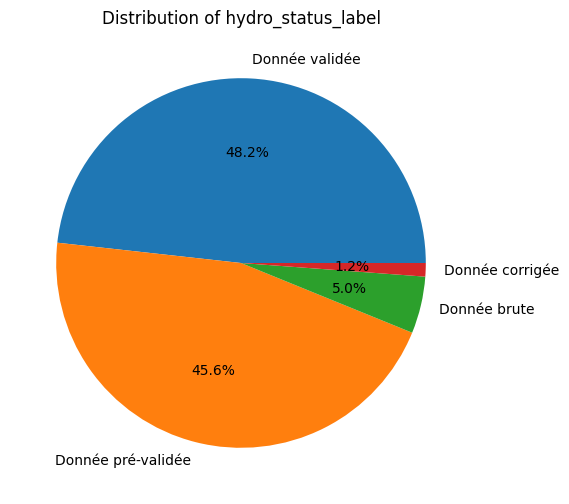

In [ ]:
# Pie chart for piezo_measure_nature_name
plt.figure(figsize=(8, 6))
Xtest['hydro_status_label'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of hydro_status_label')
plt.ylabel('')  # Remove the y-axis label
plt.show()

In [ ]:
Xtest['piezo_status'].value_counts()

,count
piezo_status,
Donnée contrôlée niveau 2,438348
Donnée contrôlée niveau 1,142645
Donnée brute,26930
Donnée interprétée,3285


### Data cleaning

In [ ]:
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()



In [ ]:
# prompt: Could you please delete the columns that have more than 80% missing value in df

# Calculate the percentage of missing values in each column
missing_percentage = df.isnull().sum() / len(df) * 100

# Identify columns with more than 80% missing values
columns_to_drop = missing_percentage[missing_percentage > 80].index

# Delete the identified columns from the DataFrame
df = df.drop(columns=columns_to_drop)

In [ ]:
df.drop_duplicates(inplace=True)


## Exploratory Analysis

### Seasonality

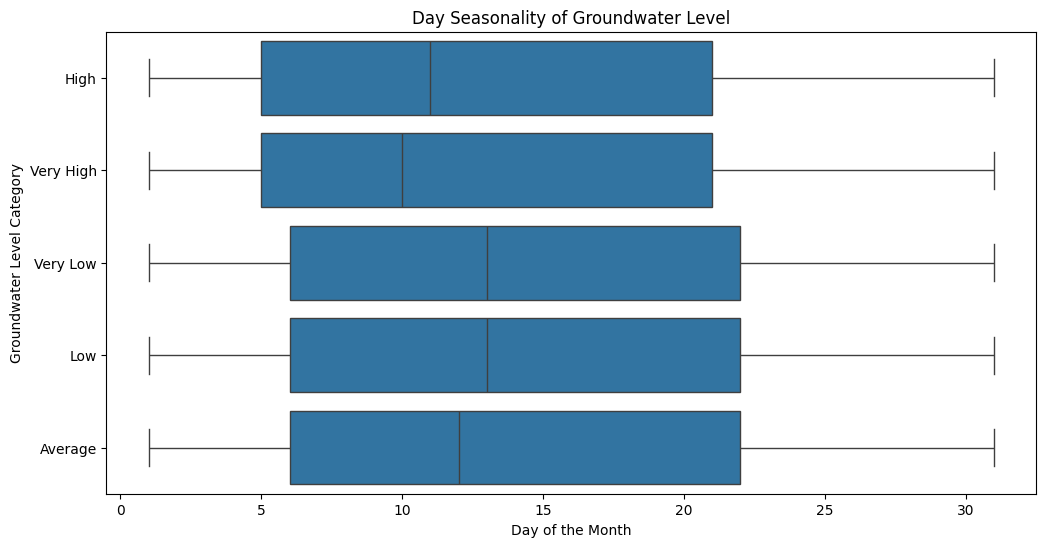

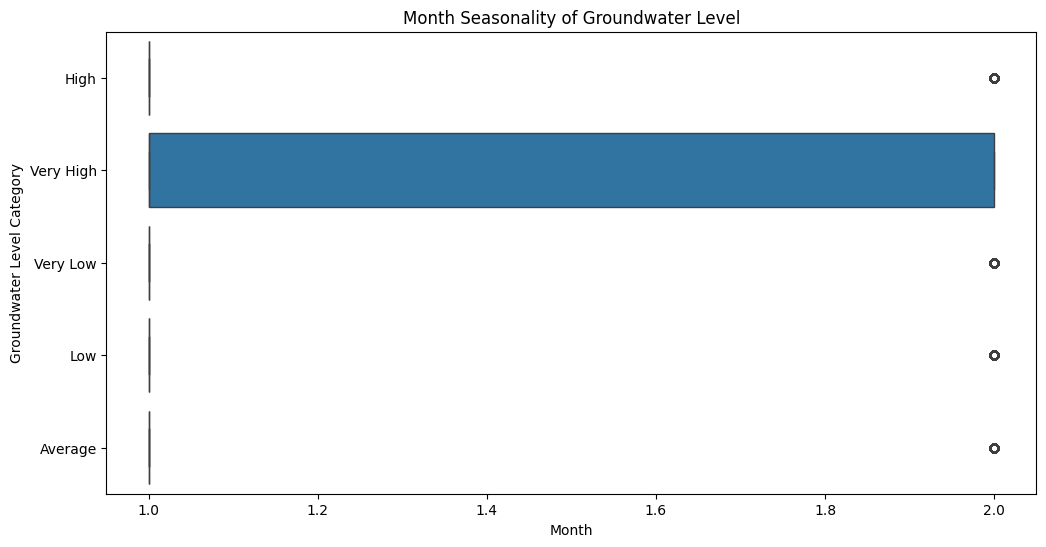

In [ ]:
# prompt: Please help me draw the seasonality graph based on the piezo_measurement_date, exploring the day and month seasonality. The y is 'piezo_groundwater_level_category'

import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'piezo_measurement_date' to datetime if not already
df['piezo_measurement_date'] = pd.to_datetime(df['piezo_measurement_date'])

# Extract day and month
df['day'] = df['piezo_measurement_date'].dt.day
df['month'] = df['piezo_measurement_date'].dt.month


# Day Seasonality
plt.figure(figsize=(12, 6))
sns.boxplot(x='day', y='piezo_groundwater_level_category', data=df)
plt.title('Day Seasonality of Groundwater Level')
plt.xlabel('Day of the Month')
plt.ylabel('Groundwater Level Category')
plt.show()


# Month Seasonality
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='piezo_groundwater_level_category', data=df)
plt.title('Month Seasonality of Groundwater Level')
plt.xlabel('Month')
plt.ylabel('Groundwater Level Category')
plt.show()

### Feature Distribution:

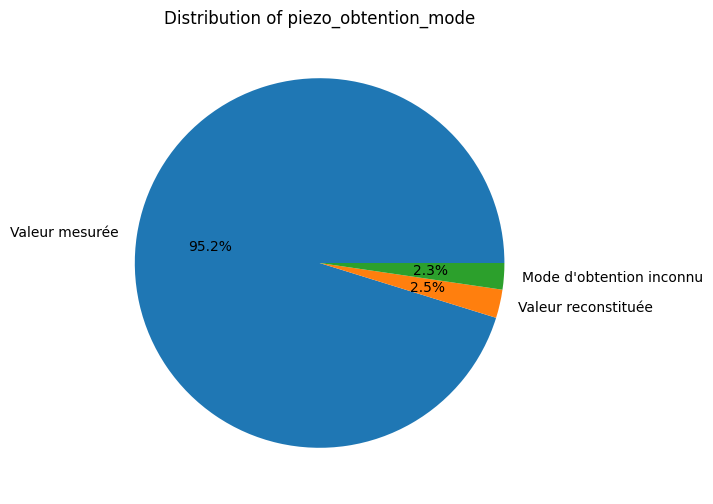

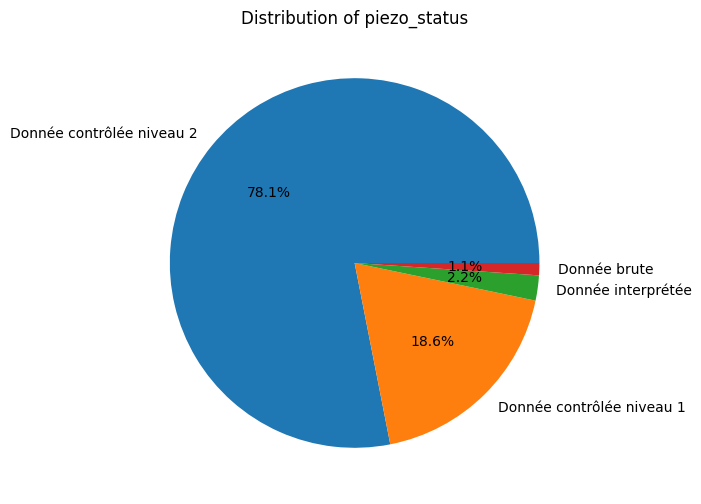

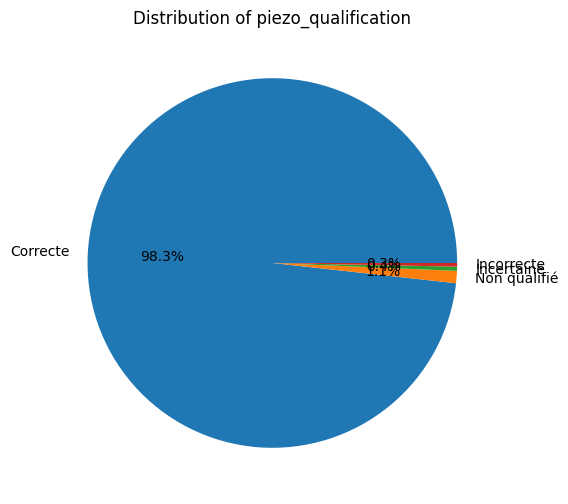

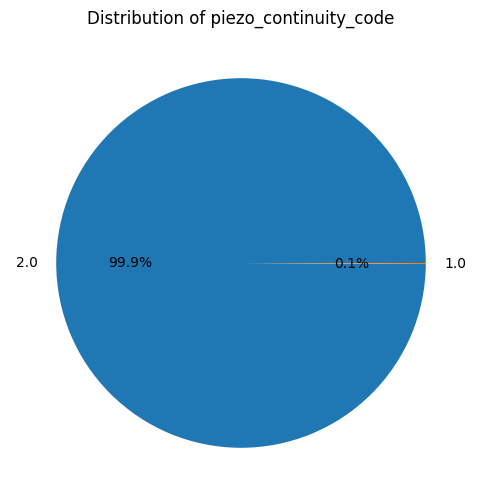

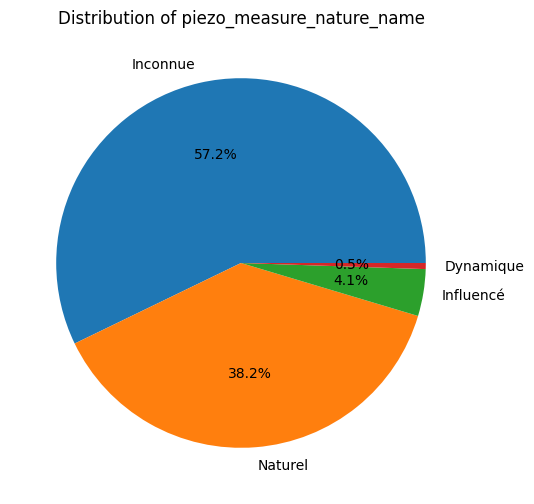

In [ ]:
# Pie chart for piezo_obtention_mode
plt.figure(figsize=(8, 6))
df['piezo_obtention_mode'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of piezo_obtention_mode')
plt.ylabel('')  # Remove the y-axis label
plt.show()

# Pie chart for piezo_status
plt.figure(figsize=(8, 6))
df['piezo_status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of piezo_status')
plt.ylabel('')  # Remove the y-axis label
plt.show()


# Pie chart for piezo_qualification
plt.figure(figsize=(8, 6))
df['piezo_qualification'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of piezo_qualification')
plt.ylabel('')  # Remove the y-axis label
plt.show()

# Pie chart for piezo_qualification
plt.figure(figsize=(8, 6))
df['piezo_continuity_code'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of piezo_continuity_code')
plt.ylabel('')  # Remove the y-axis label
plt.show()

# Pie chart for piezo_measure_nature_name
plt.figure(figsize=(8, 6))
df['piezo_measure_nature_name'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of piezo_measure_nature_name')
plt.ylabel('')  # Remove the y-axis label
plt.show()

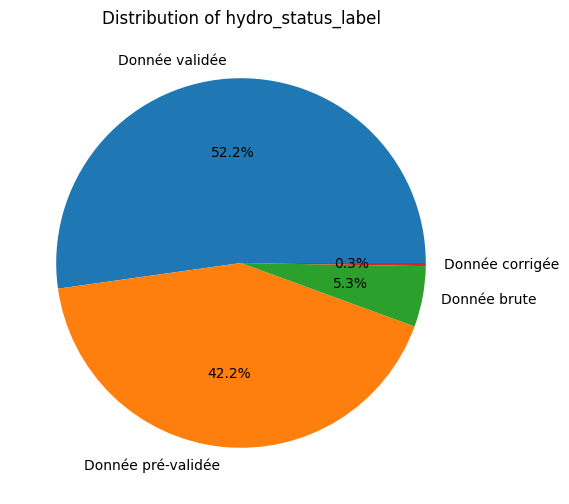

In [ ]:
# Pie chart for piezo_measure_nature_name
plt.figure(figsize=(8, 6))
df['hydro_status_label'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of hydro_status_label')
plt.ylabel('')  # Remove the y-axis label
plt.show()

#### Meteo Data

In [ ]:
meteo_data = [
    "meteo_cloudiness_height",
    "meteo_if_fog",
    "meteo_if_mist",
    "meteo_frost_duration",
    "meteo_wetting_duration",
    "meteo_humidity_duration_below_40%",
    "meteo_humidity_duration_above_80%",
    "meteo_radiation_direct",
    "meteo_wind_direction_max_inst",
    "meteo_wind_direction_max_inst_2m",
    "meteo_wind_direction_max_avg",
    "meteo_if_lightning",
    "meteo_evapotranspiration_grid",
    "meteo_evapotranspiration_Monteith",
    "meteo_wind_speed_avg_2m",
    "meteo_wind_speed_avg_10m",
    "meteo_if_smoke",
    "meteo_wind_max",
    "meteo_wind_max_2m",
    "meteo_wind_max_3s",
    "meteo_wind_avg",
    "meteo_if_frost",
    "meteo_radiation",
    "meteo_if_hail",
    "meteo_if_sleet",
    "meteo_snow_height",
    "meteo_time_tn",
    "meteo_time_tx",
    "meteo_time_humidity_min",
    "meteo_time_humidity_max",
    "meteo_time_wind_max",
    "meteo_time_wind_max_2m",
    "meteo_time_wind_max_3s",
    "meteo_time_wind_avg",
    "meteo_id",
    "meteo_radiation_IR",
    "meteo_sunshine_duration",
    "meteo_longitude",
    "meteo_latitude",
    "meteo_cloudiness",
    "meteo_if_snow",
    "meteo_snow_thickness_6h",
    "meteo_snow_thickness_max",
    "meteo_name",
    "meteo_if_thunderstorm",
    "meteo_pressure_avg",
    "meteo_if_dew",
    "meteo_rain_height",
    "meteo_sunshine_%",
    "meteo_if_snow_ground",
    "meteo_amplitude_tn_tx",
    "meteo_temperature_avg",
    "meteo_temperature_avg_threshold",
    "meteo_temperature_min",
    "meteo_temperature_min_50cm",
    "meteo_temperature_min_ground",
    "meteo_temperature_avg_tntm",
    "meteo__pressure_saturation_avg",
    "meteo_temperature_max",
    "meteo_humidity_avg",
    "meteo_humidity_min",
    "meteo_radiation_UV",
    "meteo_radiation_UV_max",
    "meteo_humidity_max",
    "meteo_if_black_ice"
]

In [ ]:
meteo = df[meteo_data]

In [ ]:
len(meteo_data)

65

In [ ]:
# prompt: Please help me delete the features that has more than 80% missing data in the meteo, and return the remaining features.

# Calculate the percentage of missing values in each meteo column
meteo_missing_percentage = meteo.isnull().sum() / len(meteo) * 100

# Identify meteo columns with more than 80% missing values
meteo_columns_to_drop = meteo_missing_percentage[meteo_missing_percentage > 80].index

# Delete the identified meteo columns from the DataFrame
meteo = meteo.drop(columns=meteo_columns_to_drop)

# The 'meteo' DataFrame now contains only the features with less than or equal to 80% missing data.
# You can access the remaining feature names using:
remaining_meteo_features = meteo.columns.tolist()
remaining_meteo_features

['meteo_frost_duration',
 'meteo_humidity_duration_below_40%',
 'meteo_humidity_duration_above_80%',
 'meteo_wind_direction_max_inst',
 'meteo_wind_direction_max_avg',
 'meteo_evapotranspiration_grid',
 'meteo_wind_speed_avg_10m',
 'meteo_wind_max',
 'meteo_wind_max_3s',
 'meteo_wind_avg',
 'meteo_time_tn',
 'meteo_time_tx',
 'meteo_time_humidity_min',
 'meteo_time_humidity_max',
 'meteo_time_wind_max',
 'meteo_time_wind_max_3s',
 'meteo_time_wind_avg',
 'meteo_id',
 'meteo_longitude',
 'meteo_latitude',
 'meteo_name',
 'meteo_rain_height',
 'meteo_amplitude_tn_tx',
 'meteo_temperature_avg',
 'meteo_temperature_avg_threshold',
 'meteo_temperature_min',
 'meteo_temperature_min_ground',
 'meteo_temperature_avg_tntm',
 'meteo__pressure_saturation_avg',
 'meteo_temperature_max',
 'meteo_humidity_avg',
 'meteo_humidity_min',
 'meteo_humidity_max']

In [ ]:
len(remaining_meteo_features)

33

In [ ]:
meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 33 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   meteo_frost_duration               73115 non-null   float64
 1   meteo_humidity_duration_below_40%  51763 non-null   float64
 2   meteo_humidity_duration_above_80%  51733 non-null   float64
 3   meteo_wind_direction_max_inst      46506 non-null   float64
 4   meteo_wind_direction_max_avg       46442 non-null   float64
 5   meteo_evapotranspiration_grid      77566 non-null   float64
 6   meteo_wind_speed_avg_10m           46460 non-null   float64
 7   meteo_wind_max                     46507 non-null   float64
 8   meteo_wind_max_3s                  42425 non-null   float64
 9   meteo_wind_avg                     46443 non-null   float64
 10  meteo_time_tn                      77929 non-null   float64
 11  meteo_time_tx                      77920

In [ ]:
meteo0 = meteo.drop(columns = 'meteo_name')

In [ ]:
# prompt: Coule you please help me generate the pearson correlation table on meteo0 dataframe

import pandas as pd

# Assuming 'meteo0' DataFrame is already defined in your environment

correlation_matrix = meteo0.corr(method='pearson')
correlation_matrix

,meteo_frost_duration,meteo_humidity_duration_below_40%,meteo_humidity_duration_above_80%,meteo_wind_direction_max_inst,meteo_wind_direction_max_avg,meteo_evapotranspiration_grid,meteo_wind_speed_avg_10m,meteo_wind_max,meteo_wind_max_3s,meteo_wind_avg,...,meteo_temperature_avg,meteo_temperature_avg_threshold,meteo_temperature_min,meteo_temperature_min_ground,meteo_temperature_avg_tntm,meteo__pressure_saturation_avg,meteo_temperature_max,meteo_humidity_avg,meteo_humidity_min,meteo_humidity_max
meteo_frost_duration,1.000000,-0.022609,0.138759,-0.165706,-0.165985,-0.233745,-0.278097,-0.287041,-0.291279,-0.275628,...,-0.667238,-0.629289,-0.633276,-0.584529,-0.629802,-0.467813,-0.476269,0.153467,0.056338,0.143449
meteo_humidity_duration_below_40%,-0.022609,1.000000,-0.296439,0.049875,0.069673,0.445808,0.036781,0.103747,0.081753,0.085072,...,0.103548,0.121668,0.060194,0.016275,0.121502,-0.216386,0.162136,-0.512141,-0.408270,-0.479661
meteo_humidity_duration_above_80%,0.138759,-0.296439,1.000000,0.029818,0.016548,-0.787286,-0.132159,-0.220797,-0.219692,-0.202837,...,-0.146904,-0.185323,-0.056847,-0.000842,-0.185513,0.395135,-0.285704,0.927291,0.817116,0.744103
meteo_wind_direction_max_inst,-0.165706,0.049875,0.029818,1.000000,0.763473,0.116718,0.157820,0.267261,0.282011,0.251732,...,0.329144,0.325367,0.326753,0.299099,0.325292,0.290477,0.248599,-0.006726,0.010023,0.013084
meteo_wind_direction_max_avg,-0.165985,0.069673,0.016548,0.763473,1.000000,0.117113,0.138093,0.249734,0.270585,0.237871,...,0.336731,0.335962,0.334797,0.296088,0.335893,0.287081,0.259221,-0.019304,-0.009948,0.013270
meteo_evapotranspiration_grid,-0.233745,0.445808,-0.787286,0.116718,0.117113,1.000000,0.324699,0.410051,0.415829,0.392855,...,0.372265,0.454449,0.345357,0.337653,0.454449,-0.132723,0.473927,-0.851500,-0.745869,-0.684638
meteo_wind_speed_avg_10m,-0.278097,0.036781,-0.132159,0.157820,0.138093,0.324699,1.000000,0.862462,0.876843,0.904125,...,0.324182,0.267361,0.393601,0.470682,0.267311,0.214633,0.064131,-0.159963,0.021198,-0.224814
meteo_wind_max,-0.287041,0.103747,-0.220797,0.267261,0.249734,0.410051,0.862462,1.000000,0.995624,0.952675,...,0.360666,0.316036,0.401106,0.445030,0.316026,0.184955,0.147554,-0.260987,-0.122669,-0.238580
meteo_wind_max_3s,-0.291279,0.081753,-0.219692,0.282011,0.270585,0.415829,0.876843,0.995624,1.000000,0.963775,...,0.375072,0.334128,0.420585,0.449683,0.334162,0.209738,0.157694,-0.260765,-0.115125,-0.250546
meteo_wind_avg,-0.275628,0.085072,-0.202837,0.251732,0.237871,0.392855,0.904125,0.952675,0.963775,1.000000,...,0.340913,0.297680,0.382031,0.430397,0.297680,0.176656,0.133783,-0.240440,-0.102186,-0.224681


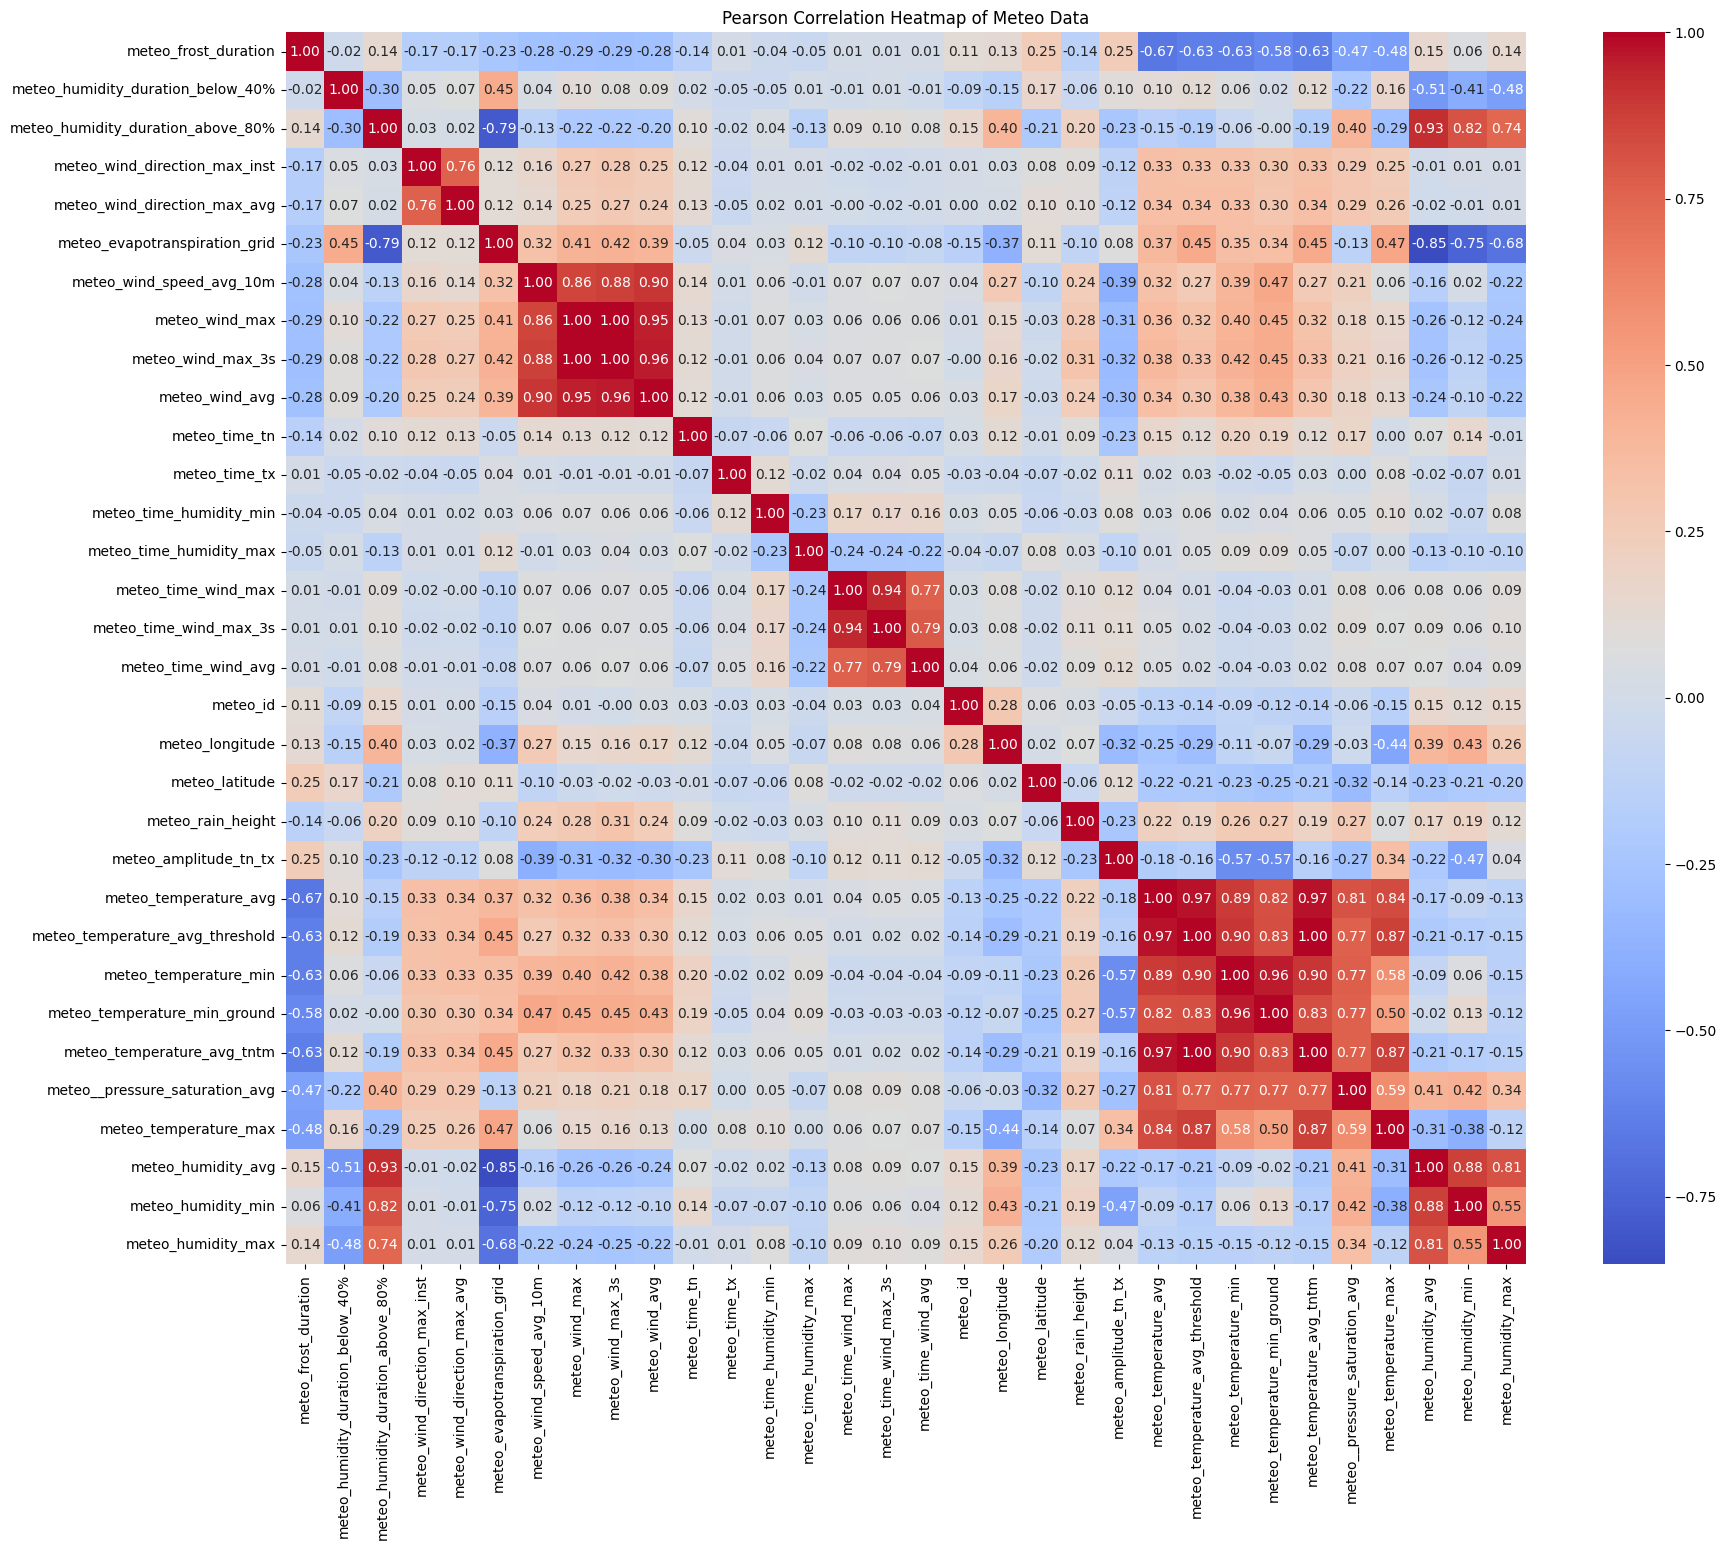

In [ ]:
# prompt: Now please generate a hotmap based on the pearson correlation table

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Heatmap of Meteo Data')
plt.show()

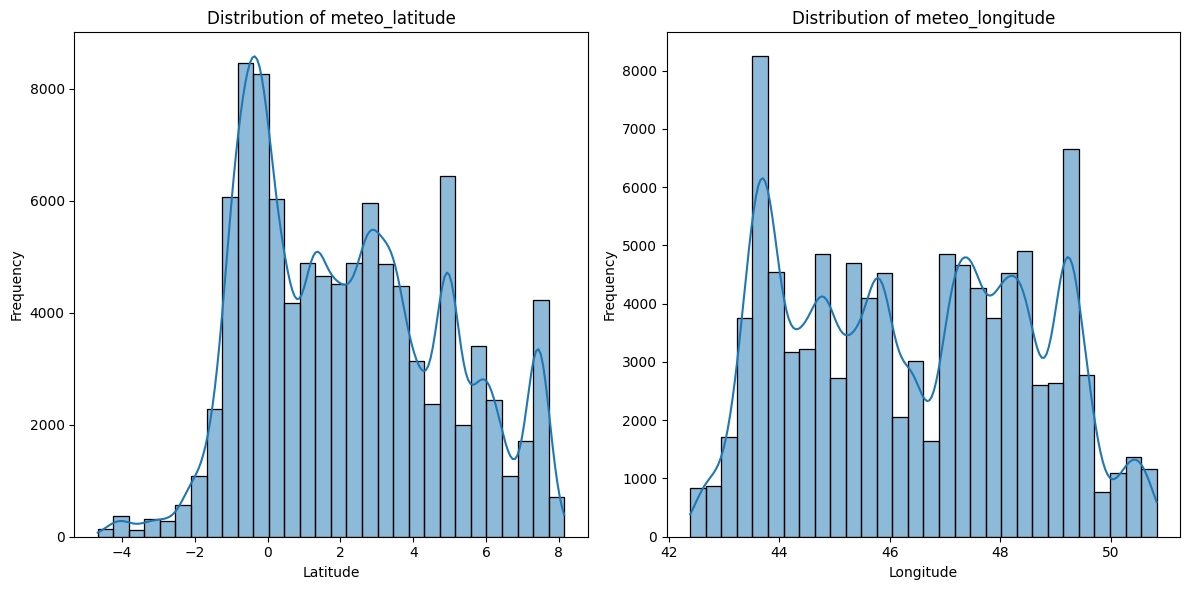

In [ ]:
# prompt: Please help me plot the distribution for meteo_latitude and longtitude in meteo0

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'meteo0' DataFrame is already defined and loaded

# Create the distribution plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(meteo0['meteo_latitude'], kde=True, bins=30)
plt.title('Distribution of meteo_latitude')
plt.xlabel('Latitude')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(meteo0['meteo_longitude'], kde=True, bins=30)
plt.title('Distribution of meteo_longitude')
plt.xlabel('Longitude')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Frequency')

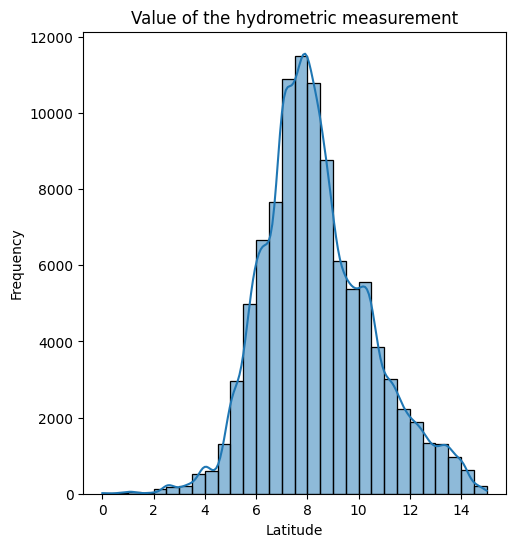

In [ ]:
# Create the distribution plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(np.log(df['hydro_observation_result_elab']), kde=True, bins=30)
plt.title('Value of the hydrometric measurement')
plt.xlabel('Latitude')
plt.ylabel('Frequency')

#### Withdrawl

In [ ]:
withdraw = [
    "prelev_structure_code_0",
    "prelev_volume_0",
    "prelev_usage_label_0",
    "prelev_volume_obtention_mode_label_0",
    "prelev_longitude_0",
    "prelev_latitude_0",
    "prelev_commune_code_insee_0",
    "prelev_structure_code_1",
    "prelev_volume_1",
    "prelev_usage_label_1",
    "prelev_volume_obtention_mode_label_1",
    "prelev_longitude_1",
    "prelev_latitude_1",
    "prelev_commune_code_insee_1",
    "prelev_structure_code_2",
    "prelev_volume_2",
    "prelev_usage_label_2",
    "prelev_volume_obtention_mode_label_2",
    "prelev_longitude_2",
    "prelev_latitude_2",
    "prelev_commune_code_insee_2",
    "prelev_other_volume_sum"
]

In [ ]:
withdrawal = df[withdraw]

In [ ]:
len(withdraw)

22

In [ ]:
# prompt: Please help me delete the features that has more than 80% missing data in the withdrrawal, and return the remaining features.

# Calculate the percentage of missing values in each withdrawal column
withdrawal_missing_percentage = withdrawal.isnull().sum() / len(withdrawal) * 100

# Identify withdrawal columns with more than 80% missing values
withdrawal_columns_to_drop = withdrawal_missing_percentage[withdrawal_missing_percentage > 80].index

# Delete the identified withdrawal columns from the DataFrame
withdrawal = withdrawal.drop(columns=withdrawal_columns_to_drop)

# The 'withdrawal' DataFrame now contains only the features with less than or equal to 80% missing data.
# You can access the remaining feature names using:
remaining_withdrawal_features = withdrawal.columns.tolist()

# Print or use the remaining features as needed
remaining_withdrawal_features

['prelev_structure_code_0',
 'prelev_volume_0',
 'prelev_usage_label_0',
 'prelev_volume_obtention_mode_label_0',
 'prelev_longitude_0',
 'prelev_latitude_0',
 'prelev_commune_code_insee_0',
 'prelev_structure_code_1',
 'prelev_volume_1',
 'prelev_usage_label_1',
 'prelev_volume_obtention_mode_label_1',
 'prelev_longitude_1',
 'prelev_latitude_1',
 'prelev_commune_code_insee_1',
 'prelev_structure_code_2',
 'prelev_volume_2',
 'prelev_usage_label_2',
 'prelev_volume_obtention_mode_label_2',
 'prelev_longitude_2',
 'prelev_latitude_2',
 'prelev_commune_code_insee_2',
 'prelev_other_volume_sum']

In [ ]:
len(remaining_withdrawal_features)

22

In [ ]:
withdrawal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   prelev_structure_code_0               98927 non-null   object 
 1   prelev_volume_0                       98927 non-null   float64
 2   prelev_usage_label_0                  98927 non-null   object 
 3   prelev_volume_obtention_mode_label_0  98927 non-null   object 
 4   prelev_longitude_0                    98927 non-null   float64
 5   prelev_latitude_0                     98927 non-null   float64
 6   prelev_commune_code_insee_0           98927 non-null   float64
 7   prelev_structure_code_1               98927 non-null   object 
 8   prelev_volume_1                       98927 non-null   float64
 9   prelev_usage_label_1                  98927 non-null   object 
 10  prelev_volume_obtention_mode_label_1  98927 non-null   object 
 11  p

#### Economic

In [ ]:
economic = [
'insee_%_agri', 'insee_pop_commune', 'insee_med_living_level',
       'insee_%_ind', 'insee_%_const','piezo_groundwater_level_category'
]

In [ ]:
econ = df[economic]

In [ ]:
# prompt: Please transform all the datatypes of economic into float

# Assuming 'econ' DataFrame is already defined and loaded

# Convert specified columns to numeric, coercing errors to NaN
for col in ['insee_%_agri', 'insee_pop_commune', 'insee_med_living_level', 'insee_%_ind', 'insee_%_const']:
    econ[col] = pd.to_numeric(econ[col], errors='coerce')

# Now, all specified columns in 'econ' should have a numeric dtype (float64 or int64),
# with any non-numeric values converted to NaN.
econ.info()

<ipython-input-128-16e4234dabb3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  econ[col] = pd.to_numeric(econ[col], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   insee_%_agri                      98949 non-null   float64
 1   insee_pop_commune                 99030 non-null   float64
 2   insee_med_living_level            97049 non-null   float64
 3   insee_%_ind                       98949 non-null   float64
 4   insee_%_const                     98949 non-null   float64
 5   piezo_groundwater_level_category  100000 non-null  object 
dtypes: float64(5), object(1)
memory usage: 4.6+ MB


In [ ]:
econ['log_insee_%_agri'] = np.log(econ['insee_%_agri'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-137-fcbcebdb7224>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  econ['log_insee_%_agri'] = np.log(econ['insee_%_agri'])


In [ ]:
econ['log_insee_pop_commune'] = np.log(econ['insee_pop_commune'])

<ipython-input-140-36f873a75190>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  econ['log_insee_pop_commune'] = np.log(econ['insee_pop_commune'])


In [ ]:
econ['log_insee_%_ind'] = np.log(econ['insee_%_ind'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-144-90067881968f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  econ['log_insee_%_ind'] = np.log(econ['insee_%_ind'])


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


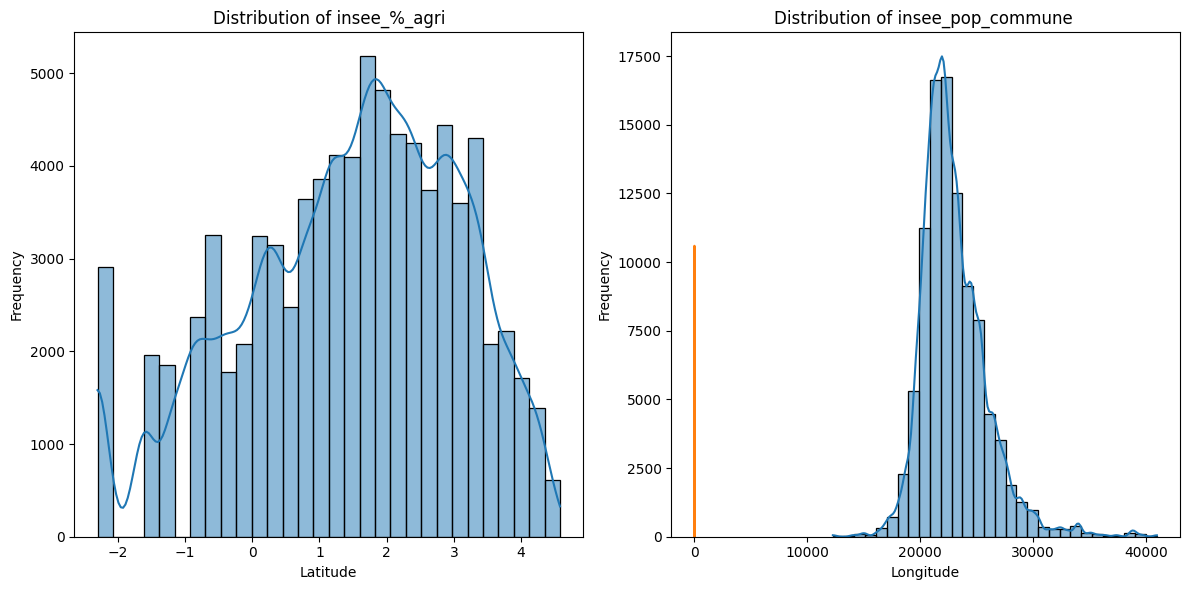

In [ ]:
# Create the distribution plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(np.log(econ['insee_%_agri']), kde=True, bins=30)
plt.title('Distribution of insee_%_agri')
plt.xlabel('Latitude')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(econ['insee_med_living_level'],kde=True, bins=30)
plt.title('Distribution of insee_med_living_level')
plt.xlabel('Longitude')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(econ['log_insee_pop_commune'],kde=True, bins=30)
plt.title('Distribution of insee_pop_commune ')
plt.xlabel('Longitude')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

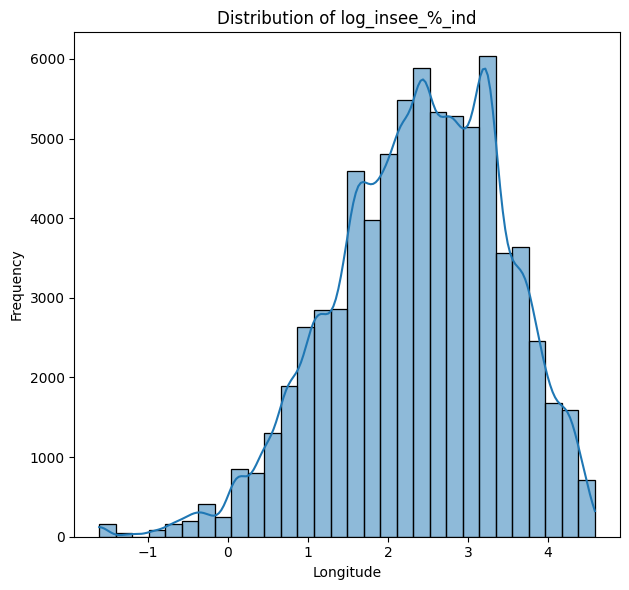

In [ ]:
# Create the distribution plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
sns.histplot(econ['log_insee_%_ind'],kde=True, bins=30)
plt.title('Distribution of log_insee_%_ind')
plt.xlabel('Longitude')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

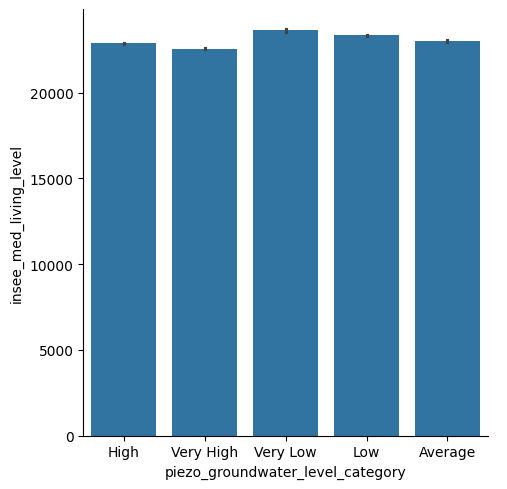

In [ ]:
import pandas as pd
import seaborn as sns

# Mean plots: height = sample mean; bars = +/- 1.96 * standard error (95% confidence interval)
# (where we recall that standard error = standard deviation / sqrt(sample size),

sns.catplot(data=econ, x='piezo_groundwater_level_category', y='insee_med_living_level', kind='bar')

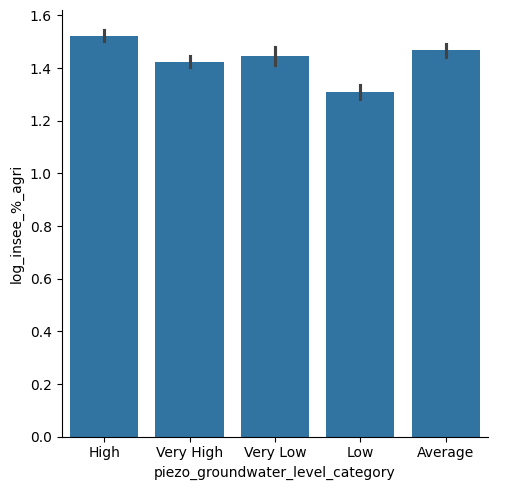

In [ ]:
sns.catplot(data=econ, x='piezo_groundwater_level_category', y='log_insee_%_agri', kind='bar')

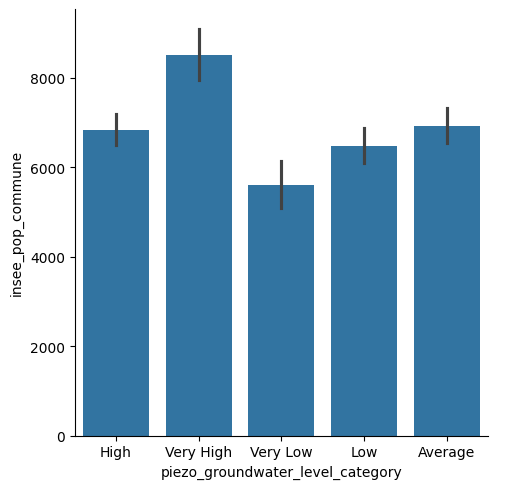

In [ ]:
sns.catplot(data=econ, x='piezo_groundwater_level_category', y='insee_pop_commune', kind='bar')

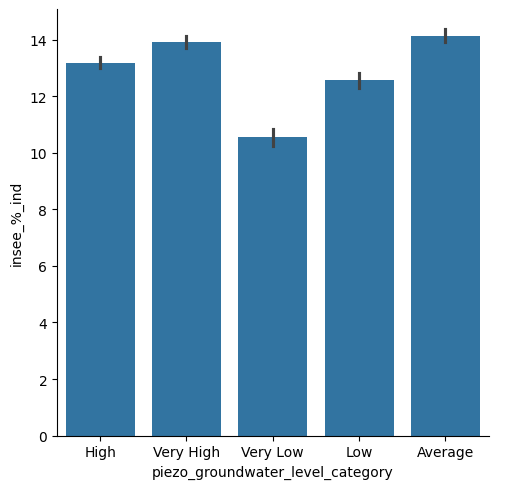

In [ ]:
sns.catplot(data=econ, x='piezo_groundwater_level_category', y='insee_%_ind', kind='bar')

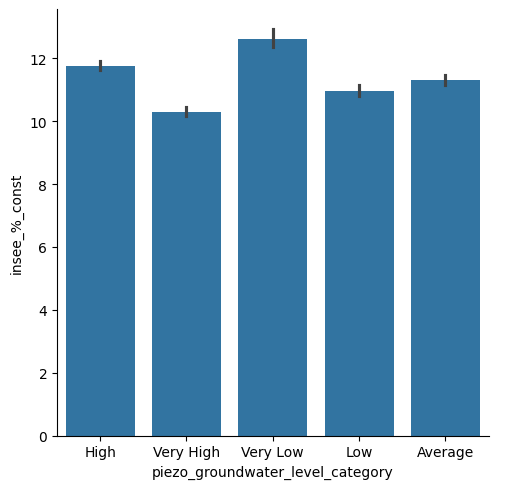

In [ ]:
sns.catplot(data=econ, x='piezo_groundwater_level_category', y='insee_%_const', kind='bar')

## Feature Selection

## RNN (LSTM)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
X_train = df[['rowindex', 'piezo_station_department_code',
       'piezo_station_update_date', 'piezo_station_investigation_depth',
       'piezo_station_pe_label', 'piezo_station_bdlisa_codes',
       'piezo_station_altitude', 'piezo_station_bss_code',
       'piezo_station_commune_name', 'piezo_station_longitude',
       'piezo_station_latitude', 'piezo_obtention_mode', 'piezo_status',
       'piezo_qualification', 'piezo_continuity_code', 'piezo_producer_code',
       'piezo_producer_name', 'piezo_measure_nature_code', 'meteo_id',
       'meteo_name', 'meteo_rain_height', 'meteo_temperature_min',
       'meteo_time_tn', 'meteo_time_tx', 'meteo_frost_duration',
       'meteo_amplitude_tn_tx', 'meteo_wind_direction_max_inst',
       'meteo_time_wind_max', 'meteo_humidity_min', 'meteo_time_humidity_min',
       'meteo_humidity_max', 'hydro_method_label', 'hydro_qualification_label',
       'hydro_hydro_quantity_elab', 'prelev_structure_code_0',
       'prelev_usage_label_0', 'prelev_volume_obtention_mode_label_0',
       'prelev_structure_code_1', 'prelev_usage_label_1',
       'prelev_structure_code_2', 'prelev_usage_label_2', 'insee%agri',
       'insee_med_living_level', 'insee%ind', 'insee%_const',
       'piezo_groundwater_level_category']]


In [ ]:
num_categories = 10  # Modifier selon vos données réelles
embedding_dim = 8    # Nombre de dimensions pour les embeddings

# Création du modèle RNN
model = Sequential([
    Embedding(input_dim=num_categories, output_dim=embedding_dim, input_length=data.shape[1]),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')  # 5 classes pour la sortie
])

# Compilation du modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Évaluation sur les données test
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

## Model 2

## Evaluation Metrics

## Business Storyline

In [ ]:
import pandas as pd
import numpy as np

# Example: Assume `df` is your DataFrame with a timestamp column named 'timestamp'.
# Create a column for the date
df['piezo_measurement_date'] = pd.to_datetime(df['timestamp']).dt.date

# Group by 'date' and sample 20 entries per day
# Replace `min_count` with the number of entries you expect on low-data days
min_count = 20
sampled_df = (
    df.groupby('piezo_measurement_date', group_keys=False)
    .apply(lambda group: group.sample(n=min(min_count, len(group)), random_state=42))
)